Multi-level OFIs are stored in this dataframe.
First level OFI is the best-level OFI.
                              ofi_00     ofi_01     ofi_02     ofi_03  \
ts_event                                                                
2024-10-21 11:54:00+00:00  -0.667227   2.974722   0.463352  -0.852568   
2024-10-21 11:55:00+00:00 -13.082748  23.191725  12.327797  -0.681297   
2024-10-21 11:56:00+00:00   1.204593  -5.356790  18.370047   0.136886   
2024-10-21 11:57:00+00:00  -1.737662  14.867649   0.345759  11.853337   
2024-10-21 11:58:00+00:00   5.062151  -2.152068   5.924721   1.585734   

                             ofi_04     ofi_05     ofi_06    ofi_07  \
ts_event                                                              
2024-10-21 11:54:00+00:00 -1.362256  -6.533267  -2.353830 -0.806233   
2024-10-21 11:55:00+00:00 -1.657209  -3.296005  -5.072902  1.095600   
2024-10-21 11:56:00+00:00 -0.474537  -2.993232   1.131588 -5.274658   
2024-10-21 11:57:00+00:00  2.349390   0.301431 

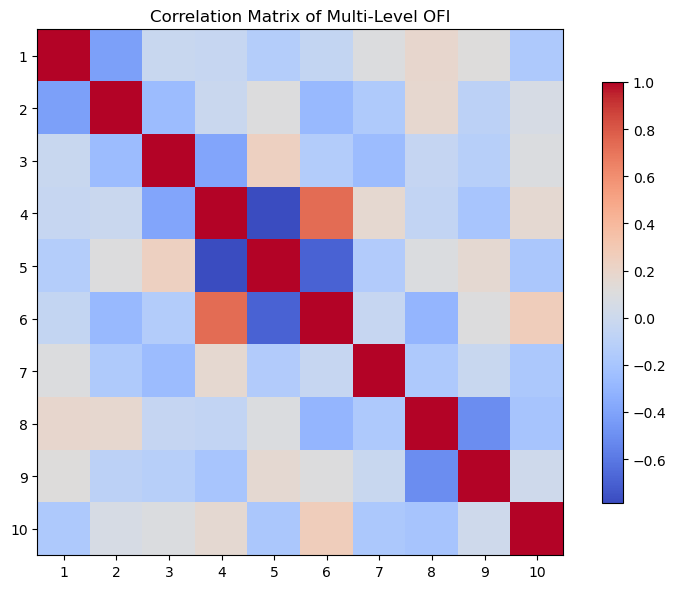

                                AAPL                                   \
                              ofi_00     ofi_01     ofi_02     ofi_03   
ts_event                                                                
2024-10-21 11:54:00+00:00  -0.667227   2.974722   0.463352  -0.852568   
2024-10-21 11:55:00+00:00 -13.082748  23.191725  12.327797  -0.681297   
2024-10-21 11:56:00+00:00   1.204593  -5.356790  18.370047   0.136886   
2024-10-21 11:57:00+00:00  -1.737662  14.867649   0.345759  11.853337   
2024-10-21 11:58:00+00:00   5.062151  -2.152068   5.924721   1.585734   

                                                                     \
                             ofi_04     ofi_05     ofi_06    ofi_07   
ts_event                                                              
2024-10-21 11:54:00+00:00 -1.362256  -6.533267  -2.353830 -0.806233   
2024-10-21 11:55:00+00:00 -1.657209  -3.296005  -5.072902  1.095600   
2024-10-21 11:56:00+00:00 -0.474537  -2.993232   1.131588 -5

In [1]:
from src.ofi import multi_asset_ofi
from src.data_loader import load_raw
from src.ofi import add_level_ofi, aggregate_ofi, integrated_ofi
from src.plots import corr_heatmap
from pathlib import Path

symbol = 'AAPL'
freq = '1min'
n_components = 10

raw = load_raw("../data/multi-asset-dataset.csv")
sym_df = raw[raw["symbol"] == symbol]

msg_df = add_level_ofi(sym_df)
bar_df = aggregate_ofi(msg_df, freq=freq, normalise=True)
bar_df["ofi_integrated"] = integrated_ofi(bar_df, n_components)

print("Multi-level OFIs are stored in this dataframe.")
print("First level OFI is the best-level OFI.")
print(bar_df.head())

out_parquet = Path(f"../ofi-data/{symbol}_ofi_{freq}.parquet")
bar_df.to_parquet(out_parquet)
print(f"Bar‑level OFI written to {out_parquet}")

corr_heatmap(bar_df, path=f"../ofi-data/{symbol}_corr.png")

multi_asset_bars = multi_asset_ofi(raw, symbols=["AAPL", "JPM"], freq="1min")
# MultiIndex columns: ('AAPL', 'ofi_00') … ('JNJ', 'ofi_09')
print(multi_asset_bars.head())

multi_asset_bars.to_parquet("../ofi-data/multi_asset_ofi.parquet")
print(f"Multi-asset bar‑level OFI written to multi_asset_ofi.csv")


In [2]:
# Best-OFI, multi-level and integrated OFI all in one dataframe
bar_df

,ofi_00,ofi_01,ofi_02,ofi_03,ofi_04,ofi_05,ofi_06,ofi_07,ofi_08,ofi_09,ofi_integrated
ts_event,,,,,,,,,,,
2024-10-21 11:54:00+00:00,-0.667227,2.974722,0.463352,-0.852568,-1.362256,-6.533267,-2.353830,-0.806233,-7.617511,-7.849187,-1.136553
2024-10-21 11:55:00+00:00,-13.082748,23.191725,12.327797,-0.681297,-1.657209,-3.296005,-5.072902,1.095600,-4.842734,7.678404,-1.960307
2024-10-21 11:56:00+00:00,1.204593,-5.356790,18.370047,0.136886,-0.474537,-2.993232,1.131588,-5.274658,4.270831,-4.991762,-2.580088
2024-10-21 11:57:00+00:00,-1.737662,14.867649,0.345759,11.853337,2.349390,0.301431,-7.234348,8.945413,-4.548064,7.154557,2.453678
2024-10-21 11:58:00+00:00,5.062151,-2.152068,5.924721,1.585734,-5.201557,16.772189,-10.873606,-3.127904,-11.265683,-18.871980,3.041636
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-21 13:00:00+00:00,-0.958336,2.831695,-2.041202,-11.240149,22.886373,-2.079103,2.349819,-9.881152,14.699906,-7.368903,-10.301315
2024-10-21 13:01:00+00:00,1.446373,-9.826828,-1.552724,13.230059,-0.026588,11.209391,-9.677937,-0.856125,2.483295,-10.720176,5.137056
2024-10-21 13:02:00+00:00,-30.027501,26.974109,13.084901,14.790332,33.200049,2.442713,13.285978,5.332265,-28.895512,12.526353,-5.678162


In [3]:
# Multi-asset OFI for AAPL and JPM
multi_asset_bars

AAPL                                   \
                              ofi_00     ofi_01     ofi_02     ofi_03   
ts_event                                                                
2024-10-21 11:54:00+00:00  -0.667227   2.974722   0.463352  -0.852568   
2024-10-21 11:55:00+00:00 -13.082748  23.191725  12.327797  -0.681297   
2024-10-21 11:56:00+00:00   1.204593  -5.356790  18.370047   0.136886   
2024-10-21 11:57:00+00:00  -1.737662  14.867649   0.345759  11.853337   
2024-10-21 11:58:00+00:00   5.062151  -2.152068   5.924721   1.585734   
...                              ...        ...        ...        ...   
2024-10-21 13:00:00+00:00  -0.958336   2.831695  -2.041202 -11.240149   
2024-10-21 13:01:00+00:00   1.446373  -9.826828  -1.552724  13.230059   
2024-10-21 13:02:00+00:00 -30.027501  26.974109  13.084901  14.790332   
2024-10-21 13:03:00+00:00  -0.586132   6.429690  -5.150857  -2.158031   
2024-10-21 13:04:00+00:00  -1.745086   6.250257   2.742278   0.124649   

                                                                      \
                              ofi_04     ofi_05     ofi_06    ofi_07   
ts_event                                                               
2024-10-21 11:54:00+00:00  -1.362256  -6.533267  -2.353830 -0.806233   
2024-10-21 11:55:00+00:00  -1.657209  -3.296005  -5.072902  1.095600   
2024-10-21 11:56:00+00:00  -0.474537  -2.993232   1.131588 -5.274658   
2024-10-21 11:57:00+00:00   2.349390   0.301431  -7.234348  8.945413   
2024-10-21 11:58:00+00:00  -5.201557  16.772189 -10.873606 -3.127904   
...                              ...        ...        ...       ...   
2024-10-21 13:00:00+00:00  22.886373  -2.079103   2.349819 -9.881152   
2024-10-21 13:01:00+00:00  -0.026588  11.209391  -9.677937 -0.856125   
2024-10-21 13:02:00+00:00  33.200049   2.442713  13.285978  5.332265   
2024-10-21 13:03:00+00:00  -3.472388 -10.026409  -8.463390  2.753044   
2024-10-21 13:04:00+00:00   6.179029   3.979864  -4.531881  6.588590   

                                                       JPM             \
                              ofi_08     ofi_09     ofi_00     ofi_01   
ts_event                                                                
2024-10-21 11:54:00+00:00  -7.617511  -7.849187  -0.667227   2.974722   
2024-10-21 11:55:00+00:00  -4.842734   7.678404 -13.082748  23.191725   
2024-10-21 11:56:00+00:00   4.270831  -4.991762   1.204593  -5.356790   
2024-10-21 11:57:00+00:00  -4.548064   7.154557  -1.817453  11.410056   
2024-10-21 11:58:00+00:00 -11.265683 -18.871980   3.398002  -0.914847   
...                              ...        ...        ...        ...   
2024-10-21 13:00:00+00:00  14.699906  -7.368903  -0.979994   2.826280   
2024-10-21 13:01:00+00:00   2.483295 -10.720176   1.451691  -1.387880   
2024-10-21 13:02:00+00:00 -28.895512  12.526353 -31.032886  36.886461   
2024-10-21 13:03:00+00:00 -13.463273   1.793919  -0.586132   4.919956   
2024-10-21 13:04:00+00:00   4.834600   2.724471  -1.745086   7.131703   

                                                                       \
                              ofi_02     ofi_03     ofi_04     ofi_05   
ts_event                                                                
2024-10-21 11:54:00+00:00   0.463352  -0.852568  -1.362256  -6.533267   
2024-10-21 11:55:00+00:00  12.327797  -0.681297  -1.657209  -3.296005   
2024-10-21 11:56:00+00:00  18.370047   0.136886  -0.474537  -2.993232   
2024-10-21 11:57:00+00:00   3.652636  11.959725   1.507156   1.187993   
2024-10-21 11:58:00+00:00   4.835618   4.853044  -8.451441  18.279507   
...                              ...        ...        ...        ...   
2024-10-21 13:00:00+00:00  -8.468012  -4.710467  20.157550   0.492704   
2024-10-21 13:01:00+00:00 -10.092706  15.910103  -2.552423  11.661382   
2024-10-21 13:02:00+00:00   6.717462  25.194205  32.284032   4.043882   
2024-10-21 13:03:00+00:00  -1.616303  -3.454626  -3.951950  -4.697936   
2024-10-21 13:04:00+00:00   